# 2.1 Befunde

* [Grabungsbefunde](#Grabungsbefunde)
    * [Befundarten](#Befundarten)
    * [Keramikfunde in Grabungsbefunden](#Keramikfunde-in-Grabungsbefunden)
    * [Fragmentierung der Funde innerhalb der Grabungsbefunde](#Fragmentierung-der-Funde-innerhalb-der-Grabungsbefunde)
* [Oberflächenabsammlungen](#Oberflächenabsammlungen)
    * [Anzahl der Scherben in den Oberflächenabsammlungen](#Anzahl-der-Scherben-in-den-Oberflächenabsammlungen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

> ToDo:
> * besser in DB unter Komplexen eine Spalte mit 'Befund' od. 'Oberfläche' einfügen und diese abfragen
> * NGK 87/102 (?) ebenfalls Befund!
> * zu Komplexen einen Eintrag der FdSt.-Art (Verhüttung; Siedl.; etc.): Verteilungsdiagram erstellen

## Grabungsbefunde

### Befundarten

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Komplex.bef_art
       FROM t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Komplex.bef_art) Not Like '%Oberfl%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,bef_art
0,BAN,rezent
1,BBS,Schicht
2,BBS,Schicht
3,BLK,Grab
4,BLK,rezent


In [3]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'bef_art', aggfunc = len)
df_pivot

bef_art
Grab          2
Grube         8
Grube (?)     2
Grube/Ofen    2
Ofen          2
Ofen (?)      1
Schicht       2
ethno         6
rezent        5
Name: ort_kurz, dtype: int64

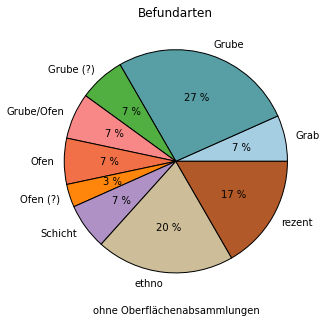

In [4]:
fig = plt.figure()
fig.set_size_inches(5,5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.xlabel('ohne Oberflächenabsammlungen')
plt.title('Befundarten')
plt.show()

### Keramikfunde in Grabungsbefunden

In [2]:
sql = """SELECT
           t_Obj.objID, 
           t_Ort.ort_kurz,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.Art,
           t_Obj.Anzahl,
           t_obj.Gewicht,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = "K")
           AND ((t_Komplex.bef_art) not like '%Oberfl%')
           AND ((t_Komplex.bef_art) not like '%ethno%')
           AND ((t_Komplex.bef_art) not like '%rezent%')
           AND ((t_obj.Notiz) not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,objID,ort_kurz,bef_nr,bef_art,Art,Anzahl,Gewicht,Gr_Clist
0,205,LKW 186,87/186,Grube,K,1,1448.0,500
1,266,MLB,85/1-3-1,Grube,K,1,156.0,120
2,267,MLB,85/1-3-1,Grube,K,1,26.0,70
3,268,MLB,85/1-3-1,Grube,K,1,54.0,120
4,269,MLB,85/1-3-1,Grube,K,1,76.0,120


In [3]:
df_pivot1 = pd.DataFrame(df.pivot_table(values = 'Gewicht', index = ['ort_kurz', 'bef_nr', 'bef_art'], aggfunc = np.sum))
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = pd.DataFrame(df.pivot_table(values = 'Anzahl', index = ['ort_kurz', 'bef_nr', 'bef_art'], aggfunc = np.sum))
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat.to_latex('../output/tabs/2-1_Bef_Grabungen.tex')
df_concat

Anzahl    \%  Gewicht (kg)    \%
ort_kurz bef_nr   bef_art                                     
BBS      87/1     Schicht         67   2.3          0.77   1.0
         87/2     Schicht         95   3.2          0.72   0.9
BLK      87/1     Grab            58   2.0          8.07  10.4
LKW 186  87/186   Grube           18   0.6          1.98   2.5
MIT      87/103   Grube           12   0.4          0.28   0.4
MKA      87/102   Grube (?)        4   0.1          0.20   0.3
MLB      85/1-3-1 Grube          305  10.4          4.50   5.8
         85/1-3-2 Grube          109   3.7          3.30   4.3
         85/1-4-3 Grab             7   0.2          0.08   0.1
         85/103   Grube           15   0.5          0.83   1.1
MUN      87/1     Grube/Ofen     406  13.8         12.55  16.2
         87/2-1-1 Grube/Ofen      79   2.7          7.05   9.1
         87/2-1-3 Grube          130   4.4         10.84  14.0
         87/3     Ofen            55   1.9          2.24   2.9
NGO      87/102   Grube (?)        6   0.2          3.56   4.6
PIK      87/1     Grube          463  15.7         12.13  15.6
         87/2     Grube         1078  36.7          8.18  10.5
         87/3     Ofen            34   1.2          0.34   0.4

> **Grabungsbefunde** Scherbengewicht

In [4]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['ort_kurz', 'bef_nr', 'bef_art'], aggfunc = np.sum)
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[True])
df_pivot.plot(y = 'Gewicht', kind = 'barh', color = 'grey', legend=None)

plt.xlabel('Gewicht [kg]')
plt.ylabel('Befunde')
plt.show()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


> **Abb. #** Grabungsbefunde: Keramikgewicht.

### Fragmentierung der Funde innerhalb der Grabungsbefunde

In [5]:
df['Gr_Clist'] = df['Gr_Clist'].replace('', np.nan) 
df = df.dropna(subset=['Gr_Clist'])

df_pivot = df.pivot_table(values = 'Art', index = ['ort_kurz', 'bef_nr'], columns = 'Gr_Clist', aggfunc = len)
# df_pivot2 = pd.DataFrame(df_pivot2)
# den von Pandas angelegten Mulit-Index auflösen
# df_pivot2 = df_pivot2.reset_index()
df_pivot = df_pivot.rename(columns={500: '>200'})
df_pivot = df_pivot.fillna(0)
df_pivot.to_latex('../output/tabs/2-1_Bef_GrabungFragmentierung.tex')
df_pivot

Gr_Clist            30.0   70.0  120.0  200.0  >200
ort_kurz bef_nr                                    
BBS      87/1       16.0   30.0    0.0    0.0   0.0
         87/2       23.0   18.0    1.0    0.0   0.0
BLK      87/1        0.0    0.0    1.0    1.0   5.0
LKW 186  87/186      6.0    7.0    4.0    0.0   1.0
MIT      87/103      0.0    2.0    1.0    0.0   0.0
MKA      87/102      0.0    0.0    0.0    1.0   0.0
MLB      85/1-3-1   18.0   71.0    9.0    1.0   0.0
         85/1-3-2   22.0   38.0    8.0    1.0   0.0
         85/1-4-3    5.0    2.0    0.0    0.0   0.0
         85/103      1.0    7.0    7.0    0.0   0.0
MUN      87/1       30.0   76.0   25.0   11.0   1.0
         87/2-1-1    5.0   18.0    6.0    5.0   4.0
         87/2-1-3   21.0   45.0   12.0    9.0   4.0
         87/3        8.0   11.0    6.0    3.0   0.0
NGO      87/102      0.0    0.0    2.0    2.0   2.0
PIK      87/1      235.0  198.0   24.0    6.0   0.0
         87/2       97.0  122.0    3.0    0.0   0.0
         87/3       11.0    9.0    1.0    0.0   0.0

> **Tab. #** Grabungsbefunde: Fragmentierung der Keramik.

In [6]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Befunde/Komplexe')
plt.xlabel('Größenklasse')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
# plt.savefig('output/NAME.pdf', bbox_inches='tight')
plt.show()

## Oberflächenabsammlungen

* 'SGH' & 'UBA' manuell hinzufügen, da diese FdSt Komplex-Nr. von Oberflächenabsammlungen ohne 0er enthalten

In [7]:
sql = """SELECT
           t_Obj.objID, 
           t_Ort.ort_kurz,
           t_Ort.ort_fluss,
           t_Komplex.komplexID,
           t_Komplex.bef_nr,
           t_Obj.Art,
           t_Obj.Gr_Clist
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Komplex.bef_art) like '%Oberfl%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,ort_kurz,ort_fluss,komplexID,bef_nr,Art,Gr_Clist
0,10,BAT,Ubangi,12,85/101,K,70
1,11,BAT,Ubangi,12,85/101,K,70
2,12,BAT,Ubangi,12,85/101,K,120
3,13,BAT,Ubangi,12,85/101,K,70
4,14,BAT,Ubangi,12,85/101,K,120


In [8]:
df_pivot = df.pivot_table(values = ['ort_kurz', 'komplexID'], index = 'ort_fluss',  aggfunc = lambda x: len(x.unique()))
df_pivot = pd.DataFrame(df_pivot)
df_pivot

,komplexID,ort_kurz
ort_fluss,,
Likwala-Esobe,28,23
Lua,5,4
Ngoko,9,8
Sangha,52,37
Ubangi,45,43
Zaire/Kongo,4,4


Die Tabelle enthält in der Spalte 'komplexID' die Anzahl der individuellen Komplexe je Flusslauf und in der Spalte 'ort_kurz' die Anzahl der verschiedenen Fundstellen.

In [9]:
sum(df_pivot['ort_kurz'])

119

In [10]:
sum(df_pivot['komplexID'])

143

zusätzlich + 13 Grabungsbefunde

### Anzahl der Scherben in den Oberflächenabsammlungen

* 'SGH' & 'UBA' manuell hinzufügen, da diese FdSt Komplex-Nr. von Oberflächenabsammlungen ohne 0er enthalten

In [11]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.komplexID,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Komplex.bef_art) like '%Oberfl%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
# display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [12]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'komplexID',  aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
# display(df_pivot.head())

In [13]:
bins = df_pivot['Anzahl'].max() - df_pivot['Anzahl'].min()
mean = df_pivot['Anzahl'].mean()

df_pivot['Anzahl'].hist(bins = round(bins/5))
plt.axvline(mean, color='r', linestyle = '--')
plt.xlabel('Anzahl Fundstücke')
plt.ylabel('Anzahl Komplexe [Oberflächenabsammlung]')
plt.legend(["Mittelwert"])
# plt.savefig('output/ABC.pdf')
plt.show()

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


Mittlere Anzahl Fundstücke je Oberflächenkomplex:

In [14]:
pd.Series({'1 Minimum':np.min(df_pivot['Anzahl']),
           '3 Mittelwert':np.mean(df_pivot['Anzahl']),
           '3 Median':np.median(df_pivot['Anzahl']),
           '4 Maximum':np.max(df_pivot['Anzahl'])})

1 Minimum         1.000000
3 Median         22.000000
3 Mittelwert     40.398601
4 Maximum       289.000000
dtype: float64

In [15]:
# schnellere Variante mit describe()
df_pivot['Anzahl'].describe()

count    143.000000
mean      40.398601
std       50.416315
min        1.000000
25%        7.000000
50%       22.000000
75%       52.500000
max      289.000000
Name: Anzahl, dtype: float64

Anzahl der Fundstücke aus Oberflächenabsammlungen:

In [16]:
np.sum(df_pivot['Anzahl'])

5777.0